In [1]:
import time 
import numpy as np
import matplotlib.pyplot as plt
import csv, igraph
from igraph import Graph 
import pandas as pd
import math


In [ ]:
#token_g token_graph token_hash_list2
reader = csv.reader(open("token_net.csv"))
token_graph = Graph.TupleList(reader, directed= True)

token_g= token_graph

a = pd.read_csv("defi_address.csv")
b = pd.read_csv("token_net_address_hash2.csv") #address
b = b.dropna(axis=1)
merged = a.merge(b, on='address')
merged=merged.drop(['address'], axis=1)


token_hash_list = merged.values
token_hash_list2=[]

for each in token_hash_list:
    token_hash_list2.append(int(each))

#contract

reader = csv.reader(open("contract_net.csv"))
contract_graph = Graph.TupleList(reader, directed= True)

contract_g= contract_graph

a = pd.read_csv("defi_address.csv")
b = pd.read_csv("contract_net_address_hash2.csv") #address
b = b.dropna(axis=1)
merged = a.merge(b, on='address')
merged=merged.drop(['address','is_erc20','is_erc721'], axis=1)


contract_hash_list = merged.values
contract_hash_list2=[]

for each in contract_hash_list:
    contract_hash_list2.append(int(each))
    
#transaction

reader = csv.reader(open("transaction_net.csv"))
trans_graph = Graph.TupleList(reader, directed= True)

trans_g= trans_graph
a = pd.read_csv("defi_address.csv")
b = pd.read_csv("transaction_net_address_hash2.csv") #address
b = b.dropna(axis=0)

merged = a[['address']].merge(b[['address','hash']], on= 'address', how='left')
#pd.merge(a, b, left_on = ['address'], right_on = ['address'], how = 'left')
#df_general[['Agency', 'ProjectNumber']].merge(df_award[['ProjectNumber', 'awarded_to']], on='ProjectNumber', how='left')
#a.merge(b, on='address')
merged=merged.drop(['address'], axis=1)

trans_hash_list = merged.values
trans_hash_list2=[]

trans_hash_list = trans_hash_list[np.logical_not(np.isnan(trans_hash_list))]

for each in trans_hash_list:
    trans_hash_list2.append(int(each))
    
#trace
chunk = pd.read_csv("trace_net.csv",chunksize=1000000)

trace_graph1= []
for c in chunk:
    trace_graph1.append(c)

trace_graph2 = pd.concat(trace_graph1)
    
trace_graph3 = trace_graph2.astype(np.uint32)

trace_graph = Graph.DataFrame(trace_graph3, directed= True)

trace_g= trace_graph

a = pd.read_csv("defi_address.csv")
b = pd.read_csv("trace_net_address_hash2.csv") #address
b = b.dropna(axis=1)
merged = a.merge(b, on='address')
merged=merged.drop(['address'], axis=1)


trace_hash_list = merged.values
trace_hash_list2=[]

for each in trace_hash_list:
    trace_hash_list2.append(int(each))

# Indegree and outdegree ALL address

In [ ]:
#outdegree-indegree token_ratio
#hash_list2
token_ratio =[]
token_zeroinhasout=[]

token_deg_cen = []
for v in token_g.vs:
    if v.index in token_hash_list2:
        if v.indegree() != 0:
            token_ratio.append((1+v.outdegree())/(1+v.indegree()))
            token_deg_cen.append((v.outdegree()+v.indegree())/len(token_hash_list2))
        else:
            token_ratio.append(0)
            
token_ratio.sort(reverse=False)

#outdegree-indegree contract_ratio
#contract_hash_list2
contract_ratio =[]
contract_zeroinhasout=[]

contract_deg_cen = []
for v in contract_g.vs:
    if v.index in contract_hash_list2:
        if v.indegree() != 0:
            contract_ratio.append((1+v.outdegree())/(1+v.indegree()))
            contract_deg_cen.append((v.outdegree()+v.indegree())/len(contract_hash_list2))
        else:
            contract_ratio.append(0)
            
contract_ratio.sort(reverse=False)

#outdegree-indegree trans_ratio
#trans_hash_list2
trans_ratio =[]
trans_zeroinhasout=[]

trans_deg_cen = []
for v in trans_g.vs:
    if v.index in trans_hash_list2:
        if v.indegree() != 0:
            trans_ratio.append((1+v.outdegree())/(1+v.indegree()))
            trans_deg_cen.append((v.outdegree()+v.indegree())/len(trans_hash_list2))
        else:
            trans_ratio.append(0)
            
trans_ratio.sort(reverse=False)

#outdegree-indegree trace_ratio
#trace_hash_list2
trace_ratio =[]
trace_zeroinhasout=[]

trace_deg_cen = []
for v in trace_g.vs:
    if v.index in trace_hash_list2:
        if v.indegree() != 0:
            trace_ratio.append((1+v.outdegree())/(1+v.indegree()))
            trace_deg_cen.append((v.outdegree()+v.indegree())/len(trace_hash_list2))
        else:
            trace_ratio.append(0)
            
trace_ratio.sort(reverse=False)

In [ ]:
#ALL
token_ratio2 =[]
token_deg_cen_all=[]
for v in token_g.vs:


    if v.indegree() != 0:
        token_ratio2.append((1+v.outdegree())/(1+v.indegree()))
        token_deg_cen_all.append((v.outdegree()+v.indegree())/len(token_g.vs))
    else:
        token_ratio2.append(0)
        token_zeroinhasout.append(v.outdegree())
        
token_ratio2.sort(reverse=False)


#ALL
contract_ratio2 =[]
contract_deg_cen_all=[]
for v in contract_g.vs:


    if v.indegree() != 0:
        contract_ratio2.append((1+v.outdegree())/(1+v.indegree()))
        contract_deg_cen_all.append((v.outdegree()+v.indegree())/len(contract_g.vs))
    else:
        contract_ratio2.append(0)
        contract_zeroinhasout.append(v.outdegree())
        
contract_ratio2.sort(reverse=False)

#ALL
trans_ratio2 =[]
trans_deg_cen_all=[]
for v in trans_g.vs:


    if v.indegree() != 0:
        trans_ratio2.append((1+v.outdegree())/(1+v.indegree()))
        trans_deg_cen_all.append((v.outdegree()+v.indegree())/len(trans_g.vs))
    else:
        trans_ratio2.append(0)
        trans_zeroinhasout.append(v.outdegree())
        
trans_ratio2.sort(reverse=False)


#ALL
trace_ratio2 =[]
trace_deg_cen_all=[]
for v in trace_g.vs:


    if v.indegree() != 0:
        trace_ratio2.append((1+v.outdegree())/(1+v.indegree()))
        trace_deg_cen_all.append((v.outdegree()+v.indegree())/len(trace_g.vs))
    else:
        trace_ratio2.append(0)
        trace_zeroinhasout.append(v.outdegree())
        
trace_ratio2.sort(reverse=False)

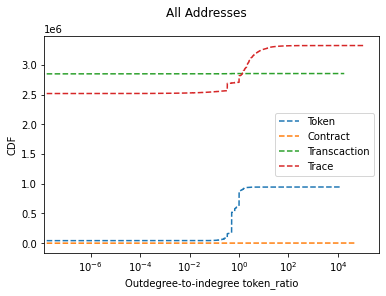

In [148]:
token_y2=list(range(0, len(token_ratio2)))
contract_y2=list(range(0, len(contract_ratio2)))
trans_y2=list(range(0, len(trans_ratio2)))
trace_y2=list(range(0, len(trace_ratio2)))

plt.plot(token_ratio2,token_y2, label = "Token", linestyle='--')
plt.plot(contract_ratio2,contract_y2, label = "Contract", linestyle='--')
plt.plot(trans_ratio2,trans_y2, label = "Transcaction", linestyle='--')
plt.plot(trace_ratio2,trace_y2, label = "Trace", linestyle='--')



plt.xscale("log")

plt.suptitle('All Addresses')
plt.xlabel('Outdegree-to-indegree token_ratio')
plt.ylabel('CDF')

plt.legend()
#https://stackoverflow.com/questions/3305865/what-is-the-difference-between-log-and-symlog
plt.show()


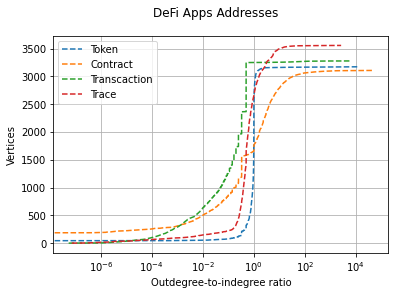

In [149]:
token_x=list(range(0, len(token_ratio)))
contract_x=list(range(0, len(contract_ratio)))
trans_x=list(range(0, len(trans_ratio)))
trace_x=list(range(0, len(trace_ratio)))

plt.plot(token_ratio , token_x, label = "Token", linestyle='--')
plt.plot(contract_ratio , contract_x, label = "Contract", linestyle='--')
plt.plot(trans_ratio , trans_x, label = "Transcaction", linestyle='--')
plt.plot(trace_ratio , trace_x, label = "Trace", linestyle='--')
 
plt.grid()
plt.xscale("log")


plt.suptitle('DeFi Apps Addresses')
plt.xlabel('Outdegree-to-indegree ratio')
plt.ylabel('Vertices')
plt.legend() 
plt.show()

In [175]:
i=0
j=0
k=0
size= len(token_ratio)
print (size)
for each in token_ratio:
    if each>=10:
        i+=1
    elif each<0.1:
        j+=1
    elif each<=1.125 and each>= 0.875:
        k+=1
print("More outdegree  More indegree  App. Same")
print(i/size,j/size,k/size)


3175
More outdegree  More indegree  App. Same
0.0034645669291338585 0.02425196850393701 0.6588976377952755


In [176]:
i=0
j=0
k=0
size= len(contract_ratio)
print (size)
for each in contract_ratio:
    if each>=10:
        i+=1
    elif each<0.1:
        j+=1
    elif each<=1.125 and each>= 0.875:
        k+=1
print("More outdegree  More indegree  App. Same")
print(i/size,j/size,k/size)


3109
More outdegree  More indegree  App. Same
0.10357027983274365 0.2714699260212287 0.05017690575747829


In [177]:
i=0
j=0
k=0
size= len(trans_ratio)
print (size)
for each in trans_ratio:
    if each>=10:
        i+=1
    elif each<0.1:
        j+=1
    elif each<=1.125 and each>= 0.875:
        k+=1
print("More outdegree  More indegree  App. Same")
print(i/size,j/size,k/size)

3280
More outdegree  More indegree  App. Same
0.007317073170731708 0.38109756097560976 0.0


In [178]:
i=0
j=0
k=0
size= len(trace_ratio)
print (size)
for each in trace_ratio:
    if each>=10:
        i+=1
    elif each<0.1:
        j+=1
    elif each<=1.125 and each>= 0.875:
        k+=1
print("More outdegree  More indegree  App. Same")
print(i/size,j/size,k/size)

3559
More outdegree  More indegree  App. Same
0.01685866816521495 0.062096094408541726 0.07277325091317786


In [ ]:
token_zeroout =[]
token_zeroin=[]

contract_zeroout =[]
contract_zeroin=[]

trans_zeroout =[]
trans_zeroin=[]

trace_zeroout =[]
trace_zeroin=[]

for v in token_g.vs:
    if v.index in token_hash_list2:
        if v.outdegree() == 0:

            token_zeroout.append(v.indegree())

        if v.indegree()==0:

            token_zeroin.append(v.outdegree())

for v in contract_g.vs:
    if v.index in contract_hash_list2:
        if v.outdegree() == 0:

            contract_zeroout.append(v.indegree())

        if v.indegree()==0:

            contract_zeroin.append(v.outdegree())

for v in trans_g.vs:
    if v.index in trans_hash_list2:
        if v.outdegree() == 0:

            trans_zeroout.append(v.indegree())

        if v.indegree()==0:

            trans_zeroin.append(v.outdegree())

for v in trace_g.vs:
    if v.index in trace_hash_list2:
        if v.outdegree() == 0:

            trace_zeroout.append(v.indegree())

        if v.indegree()==0:

            trace_zeroin.append(v.outdegree())

token_zeroout.sort(reverse=False)
token_zeroin.sort(reverse=False)

contract_zeroout.sort(reverse=False)
contract_zeroin.sort(reverse=False)

trans_zeroout.sort(reverse=False)
trans_zeroin.sort(reverse=False)

trace_zeroout.sort(reverse=False)
trace_zeroin.sort(reverse=False)


In [ ]:
x=list(range(0, len(token_zeroout)))

plt.plot(token_zeroout , x, label="0 outdegree")
x=list(range(0, len(token_zeroin)))

plt.step(token_zeroin , x, label="0 indegree")
#plt.step(ratio2[::-1],x2)

#plt.ylim(0, ratio[0])
plt.grid()
plt.xscale("log")
plt.legend()

plt.suptitle('Token Addresses')
plt.xlabel('Degree')
plt.ylabel('Vertices')

plt.show()

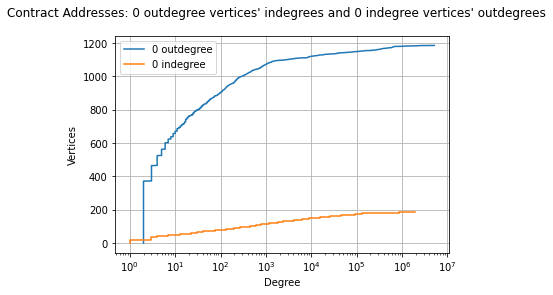

In [168]:
x=list(range(0, len(contract_zeroout)))

plt.plot(contract_zeroout , x, label="0 outdegree")
x=list(range(0, len(contract_zeroin)))

plt.step(contract_zeroin , x, label="0 indegree")
#plt.step(ratio2[::-1],x2)

#plt.ylim(0, ratio[0])
plt.grid()
plt.xscale("log")
plt.legend()

plt.suptitle('Contract Addresses: 0 outdegree vertices\' indegrees and 0 indegree vertices\' outdegrees')
plt.xlabel('Degree')
plt.ylabel('Vertices')

plt.show()

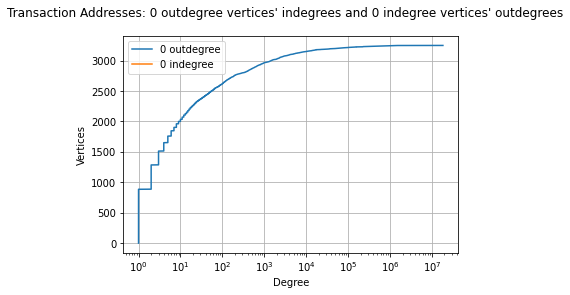

In [169]:
x=list(range(0, len(trans_zeroout)))

plt.plot(trans_zeroout , x, label="0 outdegree")
x=list(range(0, len(trans_zeroin)))

plt.step(trans_zeroin , x, label="0 indegree")
#plt.step(ratio2[::-1],x2)

#plt.ylim(0, ratio[0])
plt.grid()
plt.xscale("log")
plt.legend()

plt.suptitle('Transaction Addresses: 0 outdegree vertices\' indegrees and 0 indegree vertices\' outdegrees')
plt.xlabel('Degree')
plt.ylabel('Vertices')

plt.show()

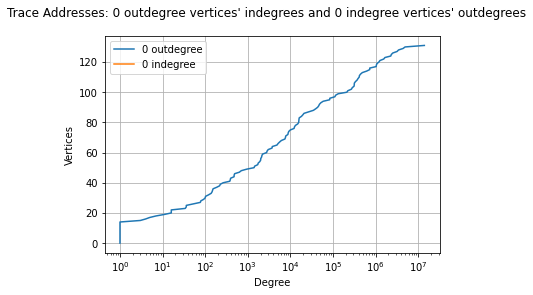

In [170]:
x=list(range(0, len(trace_zeroout)))

plt.plot(trace_zeroout , x, label="0 outdegree")
x=list(range(0, len(trace_zeroin)))

plt.step(trace_zeroin , x, label="0 indegree")
#plt.step(ratio2[::-1],x2)

#plt.ylim(0, ratio[0])
plt.grid()
plt.xscale("log")
plt.legend()

plt.suptitle('Trace Addresses: 0 outdegree vertices\' indegrees and 0 indegree vertices\' outdegrees')
plt.xlabel('Degree')
plt.ylabel('Vertices')

plt.show()

# Indegree / outdegree  

In [ ]:
#in/out

In [150]:
#outdegree-indegree token_ratio3
#hash_list2
token_ratio3 =[]

for v in token_g.vs:
    if v.index in token_hash_list2:

            token_ratio3.append((1+v.indegree())/(1+v.outdegree()))

            
token_ratio3.sort(reverse=False)

#outdegree-indegree contract_ratio3
#contract_hash_list2
contract_ratio3 =[]

for v in contract_g.vs:
    if v.index in contract_hash_list2:

            contract_ratio3.append((1+v.indegree())/(1+v.outdegree()))

            
contract_ratio3.sort(reverse=False)

#outdegree-indegree trans_ratio3
#trans_hash_list2
trans_ratio3 =[]

for v in trans_g.vs:
    if v.index in trans_hash_list2:

            trans_ratio3.append((1+v.indegree())/(1+v.outdegree()))

trans_ratio3.sort(reverse=False)

#outdegree-indegree trace_ratio3
#trace_hash_list2
trace_ratio3 =[]

for v in trace_g.vs:
    if v.index in trace_hash_list2:

            trace_ratio3.append((1+v.indegree())/(1+v.outdegree()))

            
trace_ratio3.sort(reverse=False)

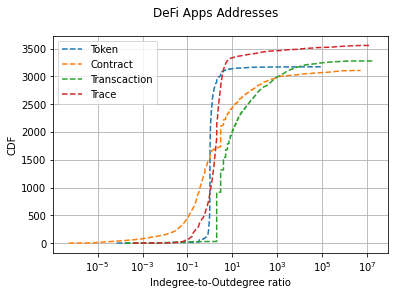

In [151]:
token_x=list(range(0, len(token_ratio3)))
contract_x=list(range(0, len(contract_ratio3)))
trans_x=list(range(0, len(trans_ratio3)))
trace_x=list(range(0, len(trace_ratio3)))

plt.plot(token_ratio3 , token_x, label = "Token", linestyle='--')
plt.plot(contract_ratio3 , contract_x, label = "Contract", linestyle='--')
plt.plot(trans_ratio3 , trans_x, label = "Transcaction", linestyle='--')
plt.plot(trace_ratio3 , trace_x, label = "Trace", linestyle='--')
#plt.step(token_ratio32[::-1],token_x2)

#plt.ylim(0, token_ratio3[0])
plt.grid()
plt.xscale("log")


plt.suptitle('DeFi Apps Addresses')
plt.xlabel('Indegree-to-Outdegree ratio')
plt.ylabel('CDF')
plt.legend()
#https://stackoverflow.com/questions/3305865/what-is-the-difference-between-log-and-symlog
plt.show()

# Undirected Graph

In [ ]:
token_g= Graph.as_undirected(token_graph)
contract_g= Graph.as_undirected(contract_graph)
trans_g= Graph.as_undirected(trans_graph)
trace_g= Graph.as_undirected(trace_graph)

"""
a = token_g.degree_distribution()
f' Number of vertices: {a.n} Mean: {a.mean} SD: {a.sd} Var: {a.var}'"""

# centrality directed

### degree centrality of defi

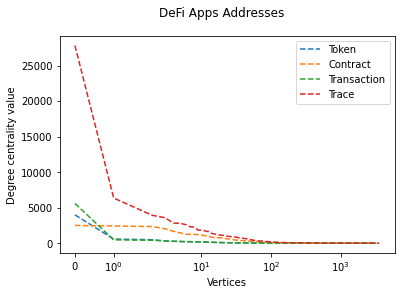

In [127]:
token_deg_cen.sort(reverse=True)
token_x=list(range(0, len(token_deg_cen)))

contract_deg_cen.sort(reverse=True)
contract_x=list(range(0, len(contract_deg_cen)))

trans_deg_cen.sort(reverse=True)
trans_x=list(range(0, len(trans_deg_cen)))

trace_deg_cen.sort(reverse=True)
trace_x=list(range(0, len(trace_deg_cen)))



plt.plot(token_x, token_deg_cen, label = "Token", linestyle='--')
plt.plot(contract_x, contract_deg_cen, label = "Contract", linestyle='--')
plt.plot(trans_x, trans_deg_cen, label = "Transaction", linestyle='--')
plt.plot(trace_x, trace_deg_cen, label = "Trace", linestyle='--')


plt.xscale("symlog")

plt.suptitle('DeFi Apps Addresses')
plt.xlabel('Vertices')
plt.ylabel('Degree centrality value')
plt.legend()
plt.show()

### degree centrality of all

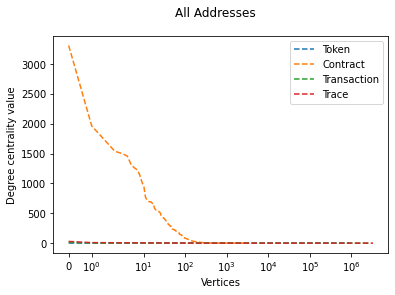

In [60]:
token_deg_cen_all.sort(reverse=True)
token_x=list(range(0, len(token_deg_cen_all)))

contract_deg_cen_all.sort(reverse=True)
contract_x=list(range(0, len(contract_deg_cen_all)))

trans_deg_cen_all.sort(reverse=True)
trans_x=list(range(0, len(trans_deg_cen_all)))

trace_deg_cen_all.sort(reverse=True)
trace_x=list(range(0, len(trace_deg_cen_all)))



plt.plot(token_x, token_deg_cen_all, label = "Token", linestyle='--')
plt.plot(contract_x, contract_deg_cen_all, label = "Contract", linestyle='--')
plt.plot(trans_x, trans_deg_cen_all, label = "Transaction", linestyle='--')
plt.plot(trace_x, trace_deg_cen_all, label = "Trace", linestyle='--')


plt.xscale("symlog")

plt.suptitle('All Addresses')
plt.xlabel('Vertices')
plt.ylabel('Degree centrality value')
plt.legend()
plt.show()

### eigenvector_centrality

### eigenvector centrality Setup

In [16]:
#token_g= graph #token_g

In [17]:
token_deg_centrality= token_g.evcent()
token_contract_cen=[]
for i in token_hash_list2:
    token_contract_cen.append(token_deg_centrality[int(i)])

    
contract_deg_centrality= contract_g.evcent()
contract_contract_cen=[]
for i in contract_hash_list2:
    contract_contract_cen.append(contract_deg_centrality[int(i)])
    
trans_deg_centrality= trans_g.evcent()
trans_contract_cen=[]
for i in trans_hash_list2:
    trans_contract_cen.append(trans_deg_centrality[int(i)])
    
trace_deg_centrality= trace_g.evcent()
trace_contract_cen=[]
for i in trace_hash_list2:
    trace_contract_cen.append(trace_deg_centrality[int(i)])


In [18]:
'''token_deg_centrality.sort(reverse=True)
token_x=list(range(0, len(token_deg_centrality)))

plt.plot(token_x, token_deg_centrality)
plt.scatter(token_x, token_deg_centrality)
plt.xscale("symlog")

plt.suptitle('All Addresses')
plt.xlabel('Vertices')
plt.ylabel('Eigenvector centrality value')

plt.show()'''

'token_deg_centrality.sort(reverse=True)\ntoken_x=list(range(0, len(token_deg_centrality)))\n\nplt.plot(token_x, token_deg_centrality)\nplt.scatter(token_x, token_deg_centrality)\nplt.xscale("symlog")\n\nplt.suptitle(\'All Addresses\')\nplt.xlabel(\'Vertices\')\nplt.ylabel(\'Eigenvector centrality value\')\n\nplt.show()'

### eigenvector centrality of All

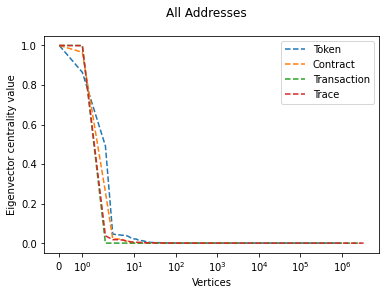

In [63]:

token_deg_centrality.sort(reverse=True)
token_x=list(range(0, len(token_deg_centrality)))


contract_deg_centrality.sort(reverse=True)
contract_x=list(range(0, len(contract_deg_centrality)))

trans_deg_centrality.sort(reverse=True)
trans_x=list(range(0, len(trans_deg_centrality)))

trace_deg_centrality.sort(reverse=True)
trace_x=list(range(0, len(trace_deg_centrality)))
### degree centrality of All
'''max_v= max(token_token_contract_cen)
min_v=min(token_token_contract_cen)
token_token_contract_cen2=[]
temp=0
for i in token_token_contract_cen:
    token_token_contract_cen2.append((i-min_v)/(max_v-min_v))'''

plt.plot(token_x, token_deg_centrality, label = "Token", linestyle='--')
plt.plot(contract_x, contract_deg_centrality, label = "Contract", linestyle='--')
plt.plot(trans_x, trans_deg_centrality, label = "Transaction", linestyle='--')
plt.plot(trace_x, trace_deg_centrality, label = "Trace", linestyle='--')

plt.xscale("symlog")

plt.suptitle('All Addresses')
plt.xlabel('Vertices')
plt.ylabel('Eigenvector centrality value')
plt.legend()
plt.show()

### eigenvector centrality of DeFi

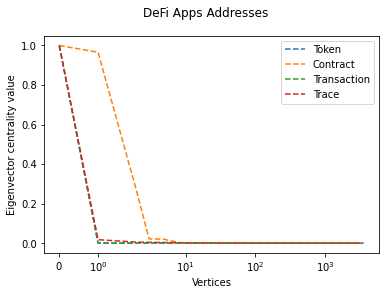

In [64]:

token_contract_cen.sort(reverse=True)
token_x=list(range(0, len(token_contract_cen)))


contract_contract_cen.sort(reverse=True)
contract_x=list(range(0, len(contract_contract_cen)))

trans_contract_cen.sort(reverse=True)
trans_x=list(range(0, len(trans_contract_cen)))

trace_contract_cen.sort(reverse=True)
trace_x=list(range(0, len(trace_contract_cen)))

'''max_v= max(token_token_contract_cen)
min_v=min(token_token_contract_cen)
token_token_contract_cen2=[]
temp=0
for i in token_token_contract_cen:
    token_token_contract_cen2.append((i-min_v)/(max_v-min_v))'''

plt.plot(token_x, token_contract_cen, label = "Token", linestyle='--')
plt.plot(contract_x, contract_contract_cen, label = "Contract", linestyle='--')
plt.plot(trans_x, trans_contract_cen, label = "Transaction", linestyle='--')
plt.plot(trace_x, trace_contract_cen, label = "Trace", linestyle='--')

plt.xscale("symlog")

plt.suptitle('DeFi Apps Addresses')
plt.xlabel('Vertices')
plt.ylabel('Eigenvector centrality value')
plt.legend()
plt.show()

## pagerank of hash_list2

In [53]:
token_pagerank= token_g.pagerank(vertices=token_hash_list2)
contract_pagerank= contract_g.pagerank(vertices=contract_hash_list2)
trans_pagerank= trans_g.pagerank(vertices=trans_hash_list2)
trace_pagerank= trace_g.pagerank(vertices=trace_hash_list2)

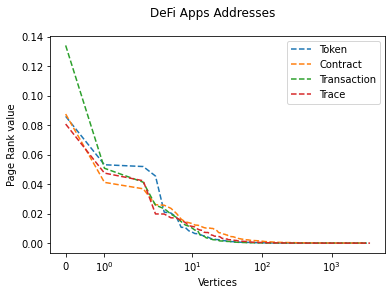

In [65]:
token_pagerank.sort(reverse=True)
token_x=list(range(0, len(token_pagerank)))
contract_pagerank.sort(reverse=True)
contract_x=list(range(0, len(contract_pagerank)))
trans_pagerank.sort(reverse=True)
trans_x=list(range(0, len(trans_pagerank)))
trace_pagerank.sort(reverse=True)
trace_x=list(range(0, len(trace_pagerank)))

plt.plot(token_x, token_pagerank, label = "Token", linestyle='--')
plt.plot(contract_x, contract_pagerank, label = "Contract", linestyle='--')
plt.plot(trans_x, trans_pagerank, label = "Transaction", linestyle='--')
plt.plot(trace_x, trace_pagerank, label = "Trace", linestyle='--')

plt.xscale("symlog")

plt.suptitle('DeFi Apps Addresses')
plt.xlabel('Vertices')
plt.ylabel('Page Rank value')
plt.legend()

plt.show()

## pagerank of all

In [55]:
token_pagerank2= token_g.pagerank(vertices=None)
contract_pagerank2= contract_g.pagerank(vertices=None)
trans_pagerank2= trans_g.pagerank(vertices=None)
trace_pagerank2= trace_g.pagerank(vertices=None)

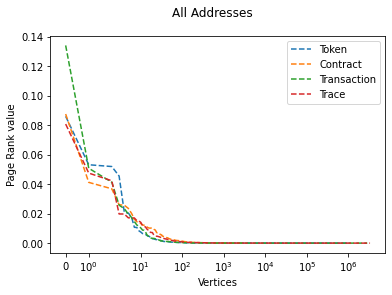

In [66]:
token_pagerank2.sort(reverse=True)
token_x2=list(range(0, len(token_pagerank2)))
contract_pagerank2.sort(reverse=True)
contract_x2=list(range(0, len(contract_pagerank2)))
trans_pagerank2.sort(reverse=True)
trans_x2=list(range(0, len(trans_pagerank2)))
trace_pagerank2.sort(reverse=True)
trace_x2=list(range(0, len(trace_pagerank2)))

plt.plot(token_x2, token_pagerank2, label = "Token", linestyle='--')
plt.plot(contract_x2, contract_pagerank2, label = "Contract", linestyle='--')
plt.plot(trans_x2, trans_pagerank2, label = "Transaction", linestyle='--')
plt.plot(trace_x2, trace_pagerank2, label = "Trace", linestyle='--')

plt.xscale("symlog")

plt.suptitle('All Addresses')
plt.xlabel('Vertices')
plt.ylabel('Page Rank value')
plt.legend()

plt.show()

# Global

### not core decomposition but token_corenss better used with UNDIRECTED GRAPH

In [26]:
'''mode - whether to compute the in-token_corensses (IN), the out-token_corensses (OUT) or the undirected token_corensses (ALL). Ignored and assumed to be ALL for undirected graphs.

in or out 
'''
from igraph import ALL
token_corenss= token_g.shell_index(mode=ALL)
contract_coreness= contract_g.shell_index(mode=ALL)
trans_coreness= trans_g.shell_index(mode=ALL)
trace_coreness= trace_g.shell_index(mode=ALL)

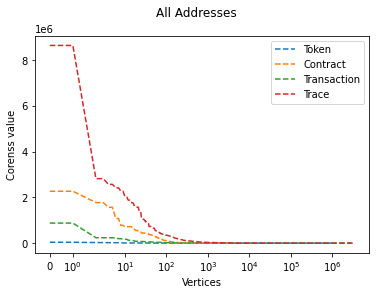

In [67]:
token_corenss.sort(reverse=True)
token_x=list(range(0, len(token_corenss)))
contract_coreness.sort(reverse=True)
contract_x=list(range(0, len(contract_coreness)))
trans_coreness.sort(reverse=True)
trans_x=list(range(0, len(trans_coreness)))
trace_coreness.sort(reverse=True)
trace_x=list(range(0, len(trace_coreness)))

plt.plot(token_x, token_corenss, label = "Token", linestyle='--')
plt.plot(contract_x, contract_coreness, label = "Contract", linestyle='--')
plt.plot(trans_x, trans_coreness, label = "Transaction", linestyle='--')
plt.plot(trace_x, trace_coreness, label = "Trace", linestyle='--')

plt.xscale("symlog")
plt.suptitle('All Addresses')
plt.xlabel('Vertices')
plt.ylabel('Corenss value')

plt.legend()
plt.show()